<a href="https://colab.research.google.com/github/devanshu464/RAG_system/blob/main/rag_pipeline_q%26a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RAG pipe line
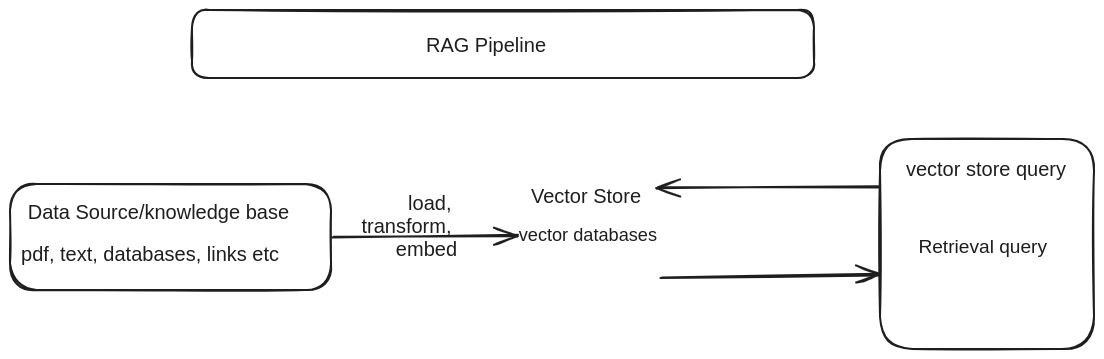

# Data ingestion

In [ ]:
## Data Ingestion
# from text file
from langchain_community.document_loaders import  TextLoader
loader = TextLoader('/home/data.txt')
documents = loader.load()
documents

## web based loader for more info check documentation
from langchain_community.document_loaders import WebBasedLoader
import bs4
loader = WebBasedLoader("https://aletheatech.com/")
web_text = loader.load()
web_text

## PDF query
from langchain_community.document_loaders import PyPDFLoader
pdf_loader = PyPDFLoader("/home/anomaly.pdf")
pdf_text = pdf_loader.load()
pdf_text





# Data Transformation

In [ ]:
## splitting text data into chunks
  from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1000, chunk_overlap = 200)
texts = text_splitter.split_documents(documents)
texts

# vector Embeddings and Vector Store

### What are Embeddings?

Embeddings are a type of dense vector representation of data, typically used in machine learning and natural language processing (NLP). They transform high-dimensional, sparse data into lower-dimensional, dense vectors while preserving the semantic relationships between data points.

### Key Characteristics of Embeddings

1. **Dense Vectors**: Embeddings are vectors of real numbers that represent the input data in a continuous vector space.
2. **Lower-Dimensional**: They reduce the dimensionality of the data, making it easier to process and work with.
3. **Semantic Meaning**: Similar data points have similar embeddings, meaning that the distance (usually measured by cosine similarity or Euclidean distance) between embeddings reflects the semantic similarity of the data points they represent.

### Examples of Embeddings

1. **Word Embeddings**: In NLP, words or phrases are represented as vectors in a continuous vector space. Common techniques for generating word embeddings include Word2Vec, GloVe, and FastText.
2. **Document Embeddings**: Entire documents or sentences can also be embedded using models like Doc2Vec or sentence transformers.
3. **Image Embeddings**: In computer vision, images can be embedded using convolutional neural networks (CNNs) to create feature vectors representing the content of the images.

### Why are Embeddings Important?

Embeddings are crucial for several reasons:

1. **Dimensionality Reduction**:
   - **Efficiency**: High-dimensional data can be computationally expensive to process. Embeddings reduce the number of dimensions, making the data more manageable.
   - **Performance**: Machine learning algorithms often perform better on lower-dimensional, dense vectors.

2. **Semantic Representation**:
   - **Meaning Preservation**: Embeddings capture the semantic meaning of the data, enabling models to understand relationships and similarities between data points.
   - **Transfer Learning**: Pre-trained embeddings can be used across different tasks, allowing models to leverage learned representations from large datasets.

3. **Versatility**:
   - **Applicability**: Embeddings can be used in various tasks such as classification, clustering, recommendation systems, and information retrieval.
   - **Interoperability**: They can be easily integrated into different machine learning models and frameworks.

### Applications of Embeddings

1. **Natural Language Processing**:
   - **Word Similarity**: Finding similar words based on their context.
   - **Machine Translation**: Translating text from one language to another.
   - **Sentiment Analysis**: Determining the sentiment of a piece of text.
   - **Named Entity Recognition (NER)**: Identifying entities like names, dates, and locations in text.

2. **Recommendation Systems**:
   - **Product Recommendations**: Suggesting products to users based on their preferences.
   - **Content Recommendations**: Recommending articles, videos, or other content based on user interests.

3. **Image and Video Analysis**:
   - **Object Recognition**: Identifying objects within images.
   - **Image Search**: Finding similar images based on content.

4. **Clustering and Classification**:
   - **Customer Segmentation**: Grouping customers based on their behaviors and preferences.
   - **Document Classification**: Categorizing documents into predefined classes.

### Conclusion

Embeddings are a powerful tool in machine learning and NLP, transforming complex, high-dimensional data into simpler, dense vectors while preserving semantic meaning. Their ability to efficiently represent and process data has made them essential in a wide range of applications, from natural language processing to recommendation systems and beyond.



In [ ]:
## converting text chunks into embeddings
from langchain_community.embeddings import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
db = Chroma.from_documents(texts[:20], OpenAIEmbeddings())





In [ ]:
query = "what is anomaly detection"
res = db.similarity_search(query)
res
res[0].page_content

## Chains
In the context of Large Language Models (LLMs), "chains" generally refer to a sequence of steps or operations that process input data to produce a final output. These chains can be designed to handle complex tasks by breaking them down into smaller, manageable sub-tasks. This concept is often used in frameworks like LangChain to build and manage sequences of actions for LLMs to execute.

### Key Concepts of Chains in LLMs

1. **Sequential Processing**:
   Chains involve a series of steps where the output of one step serves as the input for the next. This allows for the gradual transformation and refinement of data.

2. **Task Decomposition**:
   By breaking down complex tasks into smaller sub-tasks, chains help in managing and solving problems more efficiently.

3. **Modularity**:
   Each step in a chain can be a distinct, modular component that can be reused in different chains, promoting code reuse and modular design.

### Example Framework: LangChain

LangChain is a popular framework that facilitates the creation and management of chains for LLMs. It provides tools to construct chains that can handle various tasks, such as text generation, question answering, and more.

### Types of Chains

1. **Simple Chains**:
   These chains have a straightforward, linear sequence of steps. Each step performs a specific operation, such as generating text, parsing data, or making API calls.

   **Example**:
   - Step 1: Receive user input.
   - Step 2: Generate a response based on the input.
   - Step 3: Return the response to the user.

2. **Complex Chains**:
   These chains involve more intricate sequences, potentially including branching, looping, and conditional operations.

   **Example**:
   - Step 1: Receive user input.
   - Step 2: Determine the type of input (e.g., question, command).
   - Step 3: If it's a question, generate an answer; if it's a command, execute the command.
   - Step 4: Return the appropriate output based on the input type.

### Practical Applications

1. **Conversational Agents**:
   Chains can manage the flow of conversation, handling context, managing dialogue turns, and ensuring coherent responses.

   **Example**:
   ```python
   from langchain import SimpleChain, LLMChain

   # Define individual steps
   def receive_input(input_text):
       return input_text

   def generate_response(input_text):
       # Call to an LLM to generate a response
       return "Generated response to: " + input_text

   def return_response(response_text):
       print(response_text)

   # Create a simple chain
   simple_chain = SimpleChain(steps=[
       receive_input,
       generate_response,
       return_response
   ])

   # Execute the chain
   simple_chain.run("Hello, how are you?")
   ```

2. **Data Processing Pipelines**:
   Chains can process and transform data through multiple stages, such as data cleaning, feature extraction, and model inference.

   **Example**:
   ```python
   from langchain import SimpleChain

   def data_cleaning(data):
       # Perform data cleaning
       return cleaned_data

   def feature_extraction(cleaned_data):
       # Extract features from the cleaned data
       return features

   def model_inference(features):
       # Perform model inference
       return prediction

   def post_processing(prediction):
       # Perform post-processing on the prediction
       return final_output

   data_pipeline = SimpleChain(steps=[
       data_cleaning,
       feature_extraction,
       model_inference,
       post_processing
   ])

   # Execute the data processing pipeline
   result = data_pipeline.run(raw_data)
   ```

### Benefits of Using Chains

- **Modularity**: Each step can be developed and tested independently.
- **Reusability**: Components of chains can be reused in different contexts.
- **Scalability**: Chains can be easily extended or modified to accommodate new requirements.
- **Maintainability**: Breaking down complex tasks into smaller steps makes the code easier to understand and maintain.

### Conclusion

Chains in LLMs provide a structured approach to handling complex tasks by decomposing them into smaller, manageable steps. Frameworks like LangChain facilitate the creation and management of these chains, enabling efficient and modular design for a wide range of applications, from conversational agents to data processing pipelines.

In the context of Large Language Models (LLMs), a "retriever" is a component or technique used to fetch relevant information from a data source to help answer a query or support a task. Retrievers are crucial in scenarios where the LLM needs access to external knowledge bases, documents, or databases to provide accurate and contextually relevant responses.

### Key Concepts of Retrievers in LLMs

1. **Information Retrieval**:
   Retrievers are designed to locate and fetch pertinent pieces of information from a large dataset or knowledge base. This is often necessary when the LLM needs to provide detailed answers or perform specific tasks that require external data.

2. **Complement to Generative Models**:
   While LLMs like GPT-3 can generate text based on patterns learned during training, they may not always have up-to-date or domain-specific knowledge. Retrievers can complement LLMs by providing the latest or more detailed information from external sources.

3. **Relevance**:
   The effectiveness of a retriever is measured by its ability to find the most relevant information to a given query. This involves understanding the context and semantics of the query and the available data.

### Types of Retrievers

1. **Sparse Retrievers**:
   These use traditional information retrieval techniques like TF-IDF (Term Frequency-Inverse Document Frequency) and BM25 (Best Matching 25) to find documents based on keyword matching.

   **Example**:
   - **TF-IDF**: Calculates the importance of a word in a document relative to a collection of documents.
   - **BM25**: An extension of TF-IDF, adjusting term frequencies based on document length and other factors.

2. **Dense Retrievers**:
   These use dense vector representations (embeddings) to retrieve documents based on semantic similarity rather than just keyword matching. Dense retrievers typically leverage neural networks to generate these embeddings.

   **Example**:
   - **SBERT (Sentence-BERT)**: A model that produces sentence embeddings suitable for semantic similarity tasks.
   - **DPR (Dense Passage Retrieval)**: A technique where both queries and passages are embedded into a dense vector space, and similarity is calculated using these embeddings.

### Applications of Retrievers

1. **Question Answering Systems**:
   Retrievers fetch relevant documents or passages that contain potential answers to user queries. The LLM can then generate a precise answer based on the retrieved information.

   **Example**:
   ```python
   from transformers import DPRQuestionEncoder, DPRQuestionEncoderTokenizer, DPRContextEncoder, DPRContextEncoderTokenizer

   # Load pre-trained models and tokenizers for DPR
   question_encoder = DPRQuestionEncoder.from_pretrained("facebook/dpr-question_encoder-single-nq-base")
   question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained("facebook/dpr-question_encoder-single-nq-base")
   context_encoder = DPRContextEncoder.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")
   context_tokenizer = DPRContextEncoderTokenizer.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")

   # Encode query and contexts
   query = "What is the capital of France?"
   query_embedding = question_encoder(**question_tokenizer(query, return_tensors="pt"))

   contexts = ["Paris is the capital of France.", "Berlin is the capital of Germany."]
   context_embeddings = [context_encoder(**context_tokenizer(context, return_tensors="pt")) for context in contexts]

   # Compute similarities and retrieve the most relevant context
   similarities = [torch.cosine_similarity(query_embedding, context_embedding).item() for context_embedding in context_embeddings]
   most_relevant_context = contexts[similarities.index(max(similarities))]
   print(most_relevant_context)
   ```

2. **Document Retrieval**:
   Retrievers help in locating relevant documents within a large corpus, which can then be used for further processing or analysis.

3. **Knowledge Augmentation**:
   Augmenting the LLM's responses with additional information from external databases or knowledge bases to improve accuracy and relevance.

### Integration with LLMs

Retrievers can be integrated with LLMs in various ways to enhance their capabilities:

1. **Pipeline Approach**:
   The retriever fetches relevant information, which is then fed into the LLM to generate a response. This can be a simple pipeline where the output of the retriever serves as input to the LLM.

2. **Retrieval-Augmented Generation (RAG)**:
   A more sophisticated approach where the retriever and generator work in tandem. The retriever first fetches relevant documents, and the generator (LLM) uses this information to produce a final response. Models like RAG combine the strengths of both retrieval and generation.

### Benefits of Using Retrievers

- **Improved Accuracy**: By providing relevant information from external sources, retrievers help LLMs generate more accurate and contextually appropriate responses.
- **Scalability**: Retrievers can handle large datasets and knowledge bases, making it feasible to provide detailed and up-to-date information.
- **Efficiency**: Reducing the reliance on LLMs to remember vast amounts of information, instead focusing on generating responses based on retrieved context.

### Conclusion

Retrievers play a crucial role in enhancing the performance of Large Language Models by fetching relevant information from external sources. This combination of retrieval and generation allows for more accurate, contextually relevant, and detailed responses, making LLMs more powerful and versatile in various applications.

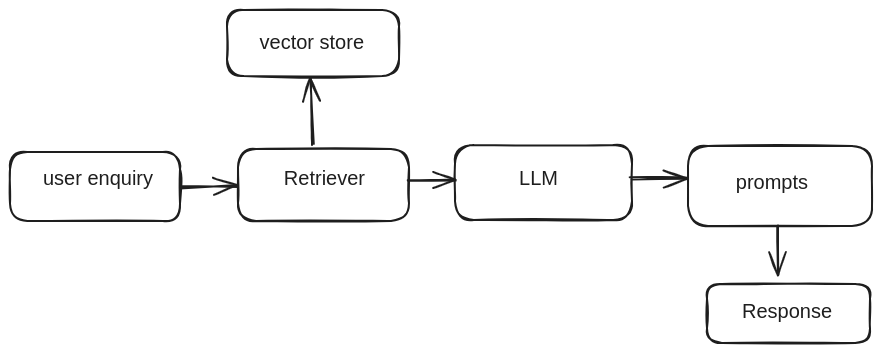

In [ ]:
from langchin_community.llms import Ollama
## load Ollama model
llm = Ollama(model="llama3")

In [ ]:
## design chatprompt template
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_template(
    """Answer the following question based only on the provided context.
    Think step by step before providing a detailed answer.
    <context>
    {context}
    </context>
    Questions : {input}"""
)

In [ ]:
## chain introduction
# create stuff document chain
from langchain.chains.combine_documents import create_stuff_documents_chain
document_chain = create_stuff_documents_chain(llm,prompt)


In [ ]:
## retriever
retriever = db.as_retriever()
retriever

In [ ]:
## retrival chain
from langchain.chains import create_retrieval_chain
retrieval_chain = create_retrieval_chain(retriever,document_chain)

In [ ]:
# user inquiry
response = retrieval_chain.invoke({"input":"your query"})
response["answer"]